# 5. Optimizer 및 Training

## 5-1. Expert : tensorflow 공식 홈페이지에서 설명하는 Expert 버전을 배워보자. 

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras import layers

In [2]:
#1. prepare mnist datasets
(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()

In [3]:
#2. build model
inputs = layers.Input((28, 28, 1))

net = layers.Conv2D(32, 3, padding = 'SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, 3, padding = 'SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size = (2, 2))(net)
net = layers.Dropout(0.25)(net)

net = layers.Conv2D(64, 3, padding = 'SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64, 3, padding = 'SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size = (2, 2))(net)
net = layers.Dropout(0.25)(net)

net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.5)(net)
net = layers.Dense(10)(net)
net = layers.Activation('softmax')(net)

In [4]:
model = tf.keras.Model(inputs = inputs, outputs = net, name = 'Expert_CNN' )

### 3. prepare Dataset(Preprocess) : 여기서부터 basic과 다른 expert방법

#### 1) 여기는 같음

In [5]:
mnist = tf.keras.datasets.mnist

#Load Data from mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()

#channel 차원 추가
train_x = train_x[..., tf.newaxis]
test_x = test_x[..., tf.newaxis]

#data normalization
train_x, test_x = train_x/255., test_x/255.

#### 2) tf.data사용

In [6]:
train_ds = tf.data.Dataset.from_tensor_slices((train_x, train_y))
train_ds = train_ds.shuffle(1000)#shuffle 설정
train_ds =train_ds.batch(32)#batch_size 설정

test_ds = tf.data.Dataset.from_tensor_slices((test_x, test_y))
test_ds = test_ds.batch(32) #test에서는 shuffle 필요 없으니까

In [8]:
image, label = next(iter(train_ds))
image.shape

TensorShape([32, 28, 28, 1])

TypeError: Cannot convert '' to EagerTensor of dtype uint8

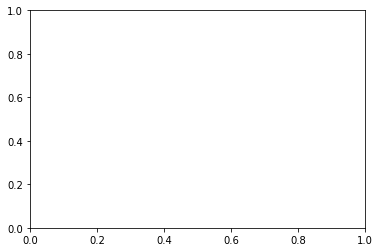

In [9]:
#visualize data
import matplotlib.pyplot as plt
%matplotlib inline

for image, label in train_ds.take(2) : 
    plt.title(label[0])
    plt.imshow(image[0, :, :, 0], 'gray')
    plt.show()